In [44]:
import json
with open("lavrov list of dicts.json") as f:
    jsonString = f.read()
    jsonData = json.loads(jsonString)
    print(jsonData[0]['ArticleText'])

Toggle navigation      / / Asset Publisher 18 November 2019 2364-18-11-2019 Mr Makei, Mr Rapota, Colleagues, friends, Welcome to a joint meeting of the collegiums of the foreign ministries of Russia and the Republic of Belarus. This meeting is taking place in the year that marks the 20  anniversary of the Treaty on the Creation of a Union State of Russia and Belarus. Twenty years ago, guided by the fundamental interests of the two peoples, our leaders decided to take Russian-Belarusian relations to a new level. Experience has shown that it was the right decision. Today, Russia and Belarus are close allies and strategic partners. Along with the EAEU, the Union State is at the forefront of integration processes unfolding within our common space. The key goals of the Union State include conducting coordinated foreign policy. Two-year programmes of concerted foreign policy actions of the states parties to the Treaty on the Creation of a Union State have been adopted by the Supreme State Co

In [49]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

lavrov_df = pd.DataFrame(jsonData)
article_words = []
article_length_words_list = []
title_words = []
title_length_words_list = []

lavrov_df = pd.DataFrame(lavrov_df)


for index, row in lavrov_df.iterrows():
    article_words = []
    sentences = sent_tokenize(lavrov_df.ArticleText[index])
    title_words = []
    title_sentences = sent_tokenize(lavrov_df.Title[index])
    for sent in sentences:
        words_list = word_tokenize(sent)
        article_words.extend(words_list)
    article_length_words = (len(article_words))
    article_length_words_list.append(article_length_words)
    for sent in title_sentences:
        words_list = word_tokenize(sent)
        title_words.extend(words_list)
    title_length_words = (len(title_words))
    title_length_words_list.append(title_length_words)
    
lavrov_df['Article_length_words'] = (article_length_words_list)
lavrov_df['Title_length_words'] = (title_length_words_list)


lavrov_df.head(10)

,Title,articleID,article_URL,ArticleText,Article_length_words,Title_length_words
0,Foreign Minister Sergey Lavrov's remarks at a ...,3904674,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 18 ...,838,35
1,Foreign Minister Sergey Lavrov's opening remar...,3906668,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 20 ...,208,27
2,Remarks and answers to media questions by Fore...,3904895,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 18 ...,2170,42
3,Excerpts from Foreign Minister Sergey Lavrov's...,3925748,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 30 ...,256,36
4,Foreign Minister Sergey Lavrov's remarks and a...,3911585,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 23 ...,1465,27
5,Foreign Minister Sergey Lavrov's answers to me...,3866037,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 25 ...,34,21
6,Foreign Minister Sergey Lavrov's remarks and a...,3870486,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 30 ...,1229,41
7,Foreign Minister Sergey Lavrov's remarks and a...,3826083,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 2 O...,12242,33
8,Foreign Minister Sergey Lavrov's interview wit...,3852496,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 14 ...,1287,23
9,Press release on Foreign Minister Sergey Lavro...,3810872,https://www.mid.ru/en/press_service/minister_s...,Toggle navigation / / Asset Publisher 26 ...,214,16


Foreign Minister Sergey Lavrov's remarks at a joint meeting of the collegiums of the Foreign Ministry of Russia and the Foreign Ministry of the Republic of Belarus, Moscow, November 18, 2019


In [72]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem.porter import * #nltk to do the stemming

stemmer = PorterStemmer()
def preprocess(text):
    result = []
    #for each word in text, if the word is stopword, remove it, otherwise lower
    #for just lowercasing or tokenization
    for token in gensim.utils.simple_preprocess(text):
        #list of stopwords will give full list, also one in nltk
        if token not in gensim.parsing.preprocessing.STOPWORDS:
            result.append(stemmer.stem(token))
    return result


#lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics = 8, id2word = dictionary,
#                                      passes=10
#                                      )


In [74]:
processed_articles = []
for article in range(len(jsonData)):
    processed_articles.append(preprocess(jsonData[article]['ArticleText']))

In [84]:
dictionary = gensim.corpora.Dictionary(processed_articles)
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n=100000)
bow_corpus = [dictionary.doc2bow(article) for article in processed_articles]

In [65]:
print("the Average length in words for all articles is", lavrov_df.Article_length_words.mean())
print("The median length in words for all articles is", lavrov_df.Article_length_words.median())
print("The maximum length in words over the whole dataset is", lavrov_df.Article_length_words.max())
print("The minimum length in words over the whole dataset is", lavrov_df.Article_length_words.min())

the Average length in words for all articles is 1332.0029019152641
The median length in words for all articles is 831.0
The maximum length in words over the whole dataset is 21847
The minimum length in words over the whole dataset is 13


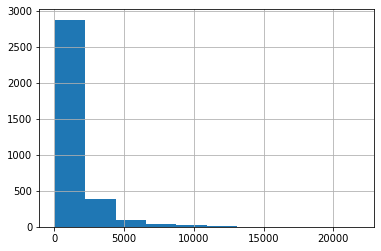

In [51]:
import numpy as np

%matplotlib inline
lavrov_df.Article_length_words.hist()

301.0


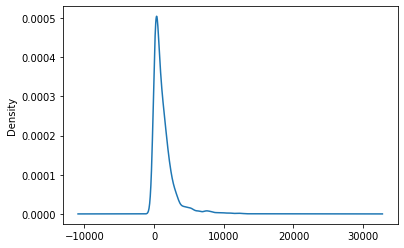

In [123]:
lavrov_df.Article_length_words.plot.density()
print(lavrov_df.Article_length_words.quantile(0.25))

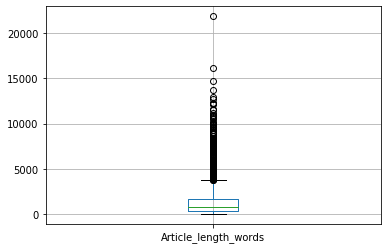

In [124]:
lavrov_df.boxplot(column = "Article_length_words");

In [3]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

lavrov_df = pd.DataFrame(jsonData)
article_words = []
article_length_words_list = []

lavrov_df = pd.DataFrame(lavrov_df)

for index, row in lavrov_df.iterrows():
    article_words = []
    sentences = sent_tokenize(lavrov_df.Title[index])
    for sent in sentences:
        words_list = word_tokenize(sent)
        article_words.extend(words_list)
    article_length_words = (len(article_words))
    article_length_words_list.append(article_length_words)
lavrov_df['Title_length_words'] = (article_length_words_list)


In [5]:
print("the Average length in words for all articles is", lavrov_df.Title_length_words.mean())
print("The median length in words for all articles is", lavrov_df.Title_length_words.median())
print("The maximum length in words over the whole dataset is", lavrov_df.Title_length_words.max())
print("The minimum length in words over the whole dataset is", lavrov_df.Title_length_words.min())

the Average length in words for all articles is 30.719674985490425
The median length in words for all articles is 30.0
The maximum length in words over the whole dataset is 93
The minimum length in words over the whole dataset is 7


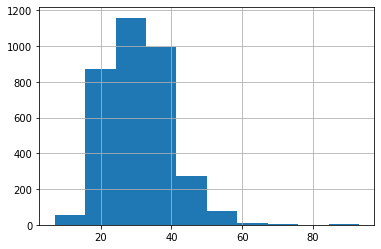

In [6]:
import numpy as np

%matplotlib inline
lavrov_df.Title_length_words.hist()

24.0


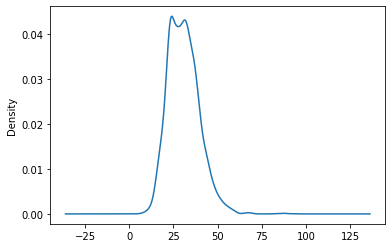

In [7]:
lavrov_df.Title_length_words.plot.density()
print(lavrov_df.Title_length_words.quantile(0.25))